In [1]:
import pandas as pd
import utils

In [23]:
# convert the rmsk to gene
df_rmsk = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/rmsk.bed", sep="\t")

/tmp/ipykernel_1211645/2266675247.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rmsk = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/rmsk.bed", sep="\t")


In [24]:
import glob
flist = glob.glob("/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/*/outs/summary*csv")

In [25]:
flist

['/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC52E_AMY_1st/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC39C_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC48D_HIP/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC37A_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW47A_PFC/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MC50B_AMY/outs/summary.csv',
 '/data1st2/hannan_25/data/snATAC_process/snATAC_01_bam/MW51A

In [26]:
adfiles={
'MC37A_AMY':'MC37A_AMY',
'MC39C_HIP':'MC39C_HIP',
'MC48D_HIP':'MC48D_HIP',
'MC50B_AMY':'MC50B_AMY',
'MC50B_HIP':'MC50B_HIP',
'MC50B_PFC':'MC50B_PFC',
'MC52E_AMY':'MC52E_AMY',
'MC52E_PFC':'MC52E_PFC',
'MW45A_HIP':'MW45A_HIP',
'MW47A_AMY':'MW47A_AMY',
'MW47A_HIP':'MW47A_HIP',
'MW47A_PFC':'MW47A_PFC',
'MW51A_AMY':'MW51A_AMY',
'MW51A_HIP':'MW51A_HIP',
'MW51A_PFC':'MW51A_PFC',
'W25_0_1_Perfrontal':'MC25A_PFC',
'W26_0_2_Perfrontal':'MW26A_PFC'
}

In [27]:
adfiles.keys()

dict_keys(['MC37A_AMY', 'MC39C_HIP', 'MC48D_HIP', 'MC50B_AMY', 'MC50B_HIP', 'MC50B_PFC', 'MC52E_AMY', 'MC52E_PFC', 'MW45A_HIP', 'MW47A_AMY', 'MW47A_HIP', 'MW47A_PFC', 'MW51A_AMY', 'MW51A_HIP', 'MW51A_PFC', 'W25_0_1_Perfrontal', 'W26_0_2_Perfrontal'])

In [28]:
df_all = pd.DataFrame()
for f in flist:

    sample = f.split("/")[-3]
    if not(sample in adfiles.keys()):
        continue
    else:
        df = pd.read_csv(f)
        df['sample'] = adfiles[sample]
        df_all = pd.concat([df_all, df], axis=0)
        print(df['Median high-quality fragments per cell'].values,df['sample'])

[28195.5] 0    MC52E_PFC
Name: sample, dtype: object
[40552.5] 0    MC50B_PFC
Name: sample, dtype: object
[23517.] 0    MC39C_HIP
Name: sample, dtype: object
[45490.] 0    MC50B_HIP
Name: sample, dtype: object
[29338.] 0    MW51A_HIP
Name: sample, dtype: object
[20728.] 0    MC48D_HIP
Name: sample, dtype: object
[26759.] 0    MW47A_AMY
Name: sample, dtype: object
[21611.5] 0    MC37A_AMY
Name: sample, dtype: object
[41144.] 0    MW47A_PFC
Name: sample, dtype: object
[31560.5] 0    MC50B_AMY
Name: sample, dtype: object
[27430.5] 0    MW51A_PFC
Name: sample, dtype: object
[18184.] 0    MW45A_HIP
Name: sample, dtype: object
[28406.] 0    MW47A_HIP
Name: sample, dtype: object
[27821.] 0    MC52E_AMY
Name: sample, dtype: object
[26764.] 0    MC25A_PFC
Name: sample, dtype: object
[36247.] 0    MW51A_AMY
Name: sample, dtype: object
[34259.] 0    MW26A_PFC
Name: sample, dtype: object


In [30]:
df_all['region'] = df_all['sample'].str.split("_").str[1]

In [31]:
df_all

,Sample ID,Genome,Pipeline version,Estimated number of cells,Confidently mapped read pairs,Estimated bulk library complexity,Fraction of all fragments in cells,Fraction of all fragments that pass all filters and overlap called peaks,Fraction of genome in peaks,Fraction of high-quality fragments in cells,...,Q30 bases in read 1,Q30 bases in read 2,Q30 bases in sample index i1,Sequenced read pairs,Sequencing saturation,TSS enrichment score,Unmapped read pairs,Valid barcodes,sample,region
0,MC52E_PFC,mm10,cellranger-atac-2.1.0,7766,0.9381,4.847372e+08,0.9514,0.1517,0.0462,0.9492,...,0.8210,0.9172,NaN,524315342,0.5545,8.3556,0.0034,0.9836,MC52E_PFC,PFC
0,MC50B_PFC,mm10,cellranger-atac-2.1.0,8764,0.9448,7.401247e+08,0.9529,0.1856,0.0484,0.9582,...,0.8732,0.9458,NaN,670596450,0.5170,8.4662,0.0036,0.9855,MC50B_PFC,PFC
0,MC39C_HIP,mm10,cellranger-atac-2.1.0,10778,0.9195,5.634264e+08,0.8895,0.1234,0.0396,0.9321,...,0.8153,0.9243,NaN,744529010,0.6094,8.2244,0.0048,0.9784,MC39C_HIP,HIP
0,MC50B_HIP,mm10,cellranger-atac-2.1.0,5486,0.9373,5.060145e+08,0.9121,0.1229,0.0427,0.8958,...,0.8784,0.9410,NaN,652892516,0.6138,8.2405,0.0061,0.9845,MC50B_HIP,HIP
0,MW51A_HIP,mm10,cellranger-atac-2.1.0,9162,0.9406,6.799489e+08,0.9188,0.2066,0.0681,0.9161,...,0.7896,0.9152,NaN,579559203,0.4874,10.4681,0.0046,0.9826,MW51A_HIP,HIP
0,MC48D_HIP,mm10,cellranger-atac-2.1.0,9317,0.9390,4.823342e+08,0.9157,0.1827,0.0594,0.8917,...,0.8213,0.9233,NaN,647040646,0.6049,11.7538,0.0051,0.9797,MC48D_HIP,HIP
0,MW47A_AMY,mm10,cellranger-atac-2.1.0,13407,0.9364,8.940807e+08,0.9414,0.2065,0.0593,0.9471,...,0.8189,0.9272,NaN,667457720,0.4546,10.7605,0.0047,0.9841,MW47A_AMY,AMY
0,MC37A_AMY,mm10,cellranger-atac-2.1.0,7184,0.9371,3.240959e+08,0.8679,0.1698,0.0727,0.8975,...,0.8018,0.9366,NaN,531837621,0.6834,12.6424,0.0033,0.9851,MC37A_AMY,AMY
0,MW47A_PFC,mm10,cellranger-atac-2.1.0,8965,0.9513,6.467576e+08,0.9557,0.2046,0.0598,0.9562,...,0.8475,0.9436,NaN,793139497,0.6143,9.8891,0.0046,0.9854,MW47A_PFC,PFC
0,MC50B_AMY,mm10,cellranger-atac-2.1.0,10352,0.9398,6.633858e+08,0.9499,0.1833,0.0531,0.9540,...,0.8570,0.9427,NaN,691646317,0.5609,10.4445,0.0052,0.9858,MC50B_AMY,AMY


In [ ]:
df_all.to_csv("/data2st1/junyi/output/atac0416/snATACQC_summary.csv", index=False)

In [ ]:
df_all.iloc[:,3:-2]

In [ ]:
df_all = df_all.dropna(axis=1)

In [ ]:
df_all

In [ ]:
df_frac_qc = df_all[["Fraction of high-quality fragments overlapping peaks","sample"]]

In [ ]:
df_frac_qc['farcq'] = pd.qcut(
    df_all["Fraction of high-quality fragments overlapping peaks"],
    q=3,                          # 分成3部分
    labels=['0', '1', '2']  # 标签
)


In [ ]:
df_frac_qc.set_index('sample', inplace=True)

In [ ]:
df_frac_qc.to_csv("/data2st1/junyi/output/atac0416/frac_qc.csv")

In [ ]:
pd.read_csv('/data2st1/junyi/output/atac0416/frac_qc.csv')

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

df_selected = df_all.iloc[:,3:-2]

X = df_selected.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

In [ ]:
np.percentile(df_selected.iloc[:,8], 33)

In [ ]:
pca.components_[0]

In [ ]:
df_selected.iloc[:,[1,5,7,8,9,15]]

In [ ]:
df_all.iloc[:,3:-2].iloc[:,15]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.scatterplot(x=pca.transform(X)[:, 0], y=pca.transform(X)[:, 1], hue=df_all['sample'], s=100)

In [ ]:
from bioinfokit import analys, visuz

df_up = pd.read_csv("/data2st1/junyi/output/atac0416/dar/region_nt/PFC_PFC_Glut_MC_mementoht.csv",index_col=0)
df_down = pd.read_csv("/data2st1/junyi/output/atac0416/dar/region_nt/PFC_PFC_Glut_MW_mementoht.csv",index_col=0)

df_all = pd.concat([df_up, df_down], axis=0)

In [ ]:
df_all.sort_values(by='de_coef', ascending=False, inplace=True)

In [ ]:
df_all.set_index('gene', inplace=True)

In [ ]:
df_all

In [ ]:
visuz.GeneExpression.volcano(
    df=df_all,
    lfc="de_coef",
    pv="de_pval",
    lfc_thr=(1, 2), pv_thr=(0.05, 0.01),
)


In [ ]:
df_rmsk = df_rmsk.dropna()

In [ ]:
df_rmsk['genoStart'] = df_rmsk['genoStart'].astype(int)
df_rmsk['genoEnd'] = df_rmsk['genoEnd'].astype(int)

In [ ]:
df_rmsk['names'] = df_rmsk['genoName']+":"+ df_rmsk['genoStart'].astype(str) + "-" + df_rmsk['genoEnd'].astype(str)

In [ ]:
df_rmsk.head()

In [ ]:
set(df_rmsk.repClass)

In [ ]:
df_rmsk["type"] = "Other repeats"

In [ ]:
df_rmsk.loc[df_rmsk.repClass.str.contains("SINE"),"type"] = "SINE"
df_rmsk.loc[df_rmsk.repClass.str.contains("LINE"),"type"] = "LINE"
df_rmsk.loc[df_rmsk.repClass.str.contains("LTR"),"type"] = "LTR"

In [ ]:
df_rmsk_select = df_rmsk[["genoName", "genoStart", "genoEnd",'strand', "type", "names"]]

In [ ]:
df_rmsk_select.columns = ["chr", "start", "end", "strand", "type", "names"]
df_rmsk_select

In [ ]:
df_rmsk_select = df_rmsk_select[df_rmsk_select['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [ ]:
df_rmsk_gene = utils.annotate_region(df_rmsk_select,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
df_rmsk_gene.loc[df_rmsk_gene.distance!= 0,'gene_name'] = 'intergenic'
df_rmsk_gene.loc[df_rmsk_gene.distance!= 0,'gene_id'] = 'intergenic'


In [ ]:
df_rmsk_gene['score'] = "."

In [ ]:
df_all_rmsk_gene= df_rmsk_gene[['chr', 'start', 'end','score', 'strand_x','gene_name', 'gene_id', 'type']]
df_all_rmsk_gen

In [ ]:
for type in df_all_rmsk_gene['type'].unique():
    df_rmsk_gene_type = df_all_rmsk_gene[df_all_rmsk_gene['type'] == type]
    df_rmsk_gene_type.to_csv(f"/data2st1/junyi/output/atac0416/cCRE/{type}.bed", sep="\t", index=False, header=False)

In [ ]:
df_cpg = pd.read_csv("/data2st1/junyi/output/atac0416/cCRE/cpgIslandExt.txt", sep="\t", header=None)

In [ ]:
df_cpg.iloc[:,4] = df_cpg.iloc[:,4].str.replace(" ", "")

In [ ]:
df_cpg_subset = df_cpg.iloc[:,[1,2,3,4]]
df_cpg_subset.columns = ["chr", "start", "end", "type"]

In [ ]:
df_cpg_subset
df_cpg_subset = df_cpg_subset[df_cpg_subset['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [ ]:
df_cpg_subset['names'] = df_cpg_subset['chr'] + ":" + df_cpg_subset['start'].astype(str) + "-" + df_cpg_subset['end'].astype(str)

In [ ]:
df_cpg_subset_gene = utils.annotate_region(df_cpg_subset,region_col='names', bedfile='/data2st1/junyi/generegion_vM23/genebody_selected.bed')

In [ ]:
df_cpg_subset_gene

In [ ]:
df_cpg_subset_gene.loc[df_cpg_subset_gene.distance!= 0,'gene_name'] = 'intergenic'
df_cpg_subset_gene.loc[df_cpg_subset_gene.distance!= 0,'gene_id'] = 'intergenic'

In [ ]:
df_cpg_subset_gene['score'] = "."

In [ ]:
df_cpg_subset_gene= df_cpg_subset_gene[['chr', 'start', 'end','score', 'strand','gene_name', 'gene_id', 'type']]
df_cpg_subset_gene

In [ ]:
df_cpg_subset_gene.to_csv("/data2st1/junyi/output/atac0416/cCRE/cpg.bed", sep="\t", index=False, header=False)

In [ ]:
df_interg = pd.read_csv("/data2st1/junyi/generegion_vM23/intergenic.bed", sep="\t", header=None)

In [ ]:
df_interg.columns = ["chr", "start", "end", "score", "strand", "gene_name"]

In [ ]:
df_interg['type'] = df_interg['gene_id'] = df_interg['gene_name'] 


In [ ]:
df_interg = df_interg[df_interg['chr'].str.match(r'^chr([1-9]|1\d|2[0-2]|[XYM])$')]


In [ ]:
df_interg.loc[df_interg.end==".","end"] = df_interg.loc[df_interg.end==".","start"]

In [ ]:
df_interg.to_csv("/data2st1/junyi/output/atac0416/cCRE/intergenic.bed", sep="\t", index=False, header=False)

In [4]:
df_tf_scenic = pd.read_csv('/data1st1/yejun/mean_data_ordered.csv',index_col=0)

<Axes: >

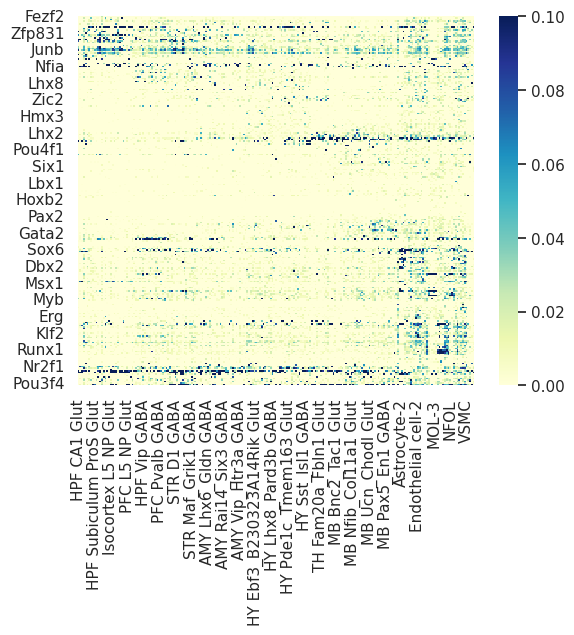

In [12]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
sns.heatmap(df_tf_scenic.clip(0,0.1), cmap="YlGnBu")